<img src="https://pm1.narvii.com/5887/02b61b74eaec1060b56a3fcfed42ecc24a457a2e_hq.jpg">

In this hands-on, we will use the Marvel dataset to practice using different plots to visualize distributions of values between groups. You are free to come up with you own questions and use one of the categorical plots to help answer each question. You are also free to build your own dataframe that contains a specific subset of the data to help you answer your questions.

The dataset is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv

Data source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

| Variable |	Definition |
| :------- | :-
|page_id|	The unique identifier for that characters page within the wikia
|name|	The name of the character
|urlslug|	The unique url within the wikia that takes you to the character
|ID|	The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
|ALIGN|	If the character is Good, Bad or Neutral
|EYE|	Eye color of the character
|HAIR|	Hair color of the character
|SEX|	Sex of the character (e.g. Male, Female, etc.)
|GSM|	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
|ALIVE|	If the character is alive or deceased
|APPEARANCES|	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
|FIRST APPEARANCE|	The month and year of the character's first appearance in a comic book, if available
|YEAR|	The year of the character's first appearance in a comic book, if available

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

marvel_df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv")

In [20]:
marvel_df

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


## Q1. How big is this dataset?
Use pandas to find out the number of rows and columns.

In [21]:
marvel_df.shape

(16376, 13)

## Q2. Strip plots
Come up with a question using this dataset and use a `strip` plot to help answer the question. State your question in a markdown cell. Recall that a `strip` plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

What is the distribution of character appearances for each eye color group?


Text(0.5, 1.0, 'Distribution of Appearances Based on the Character Eye Color Groups')

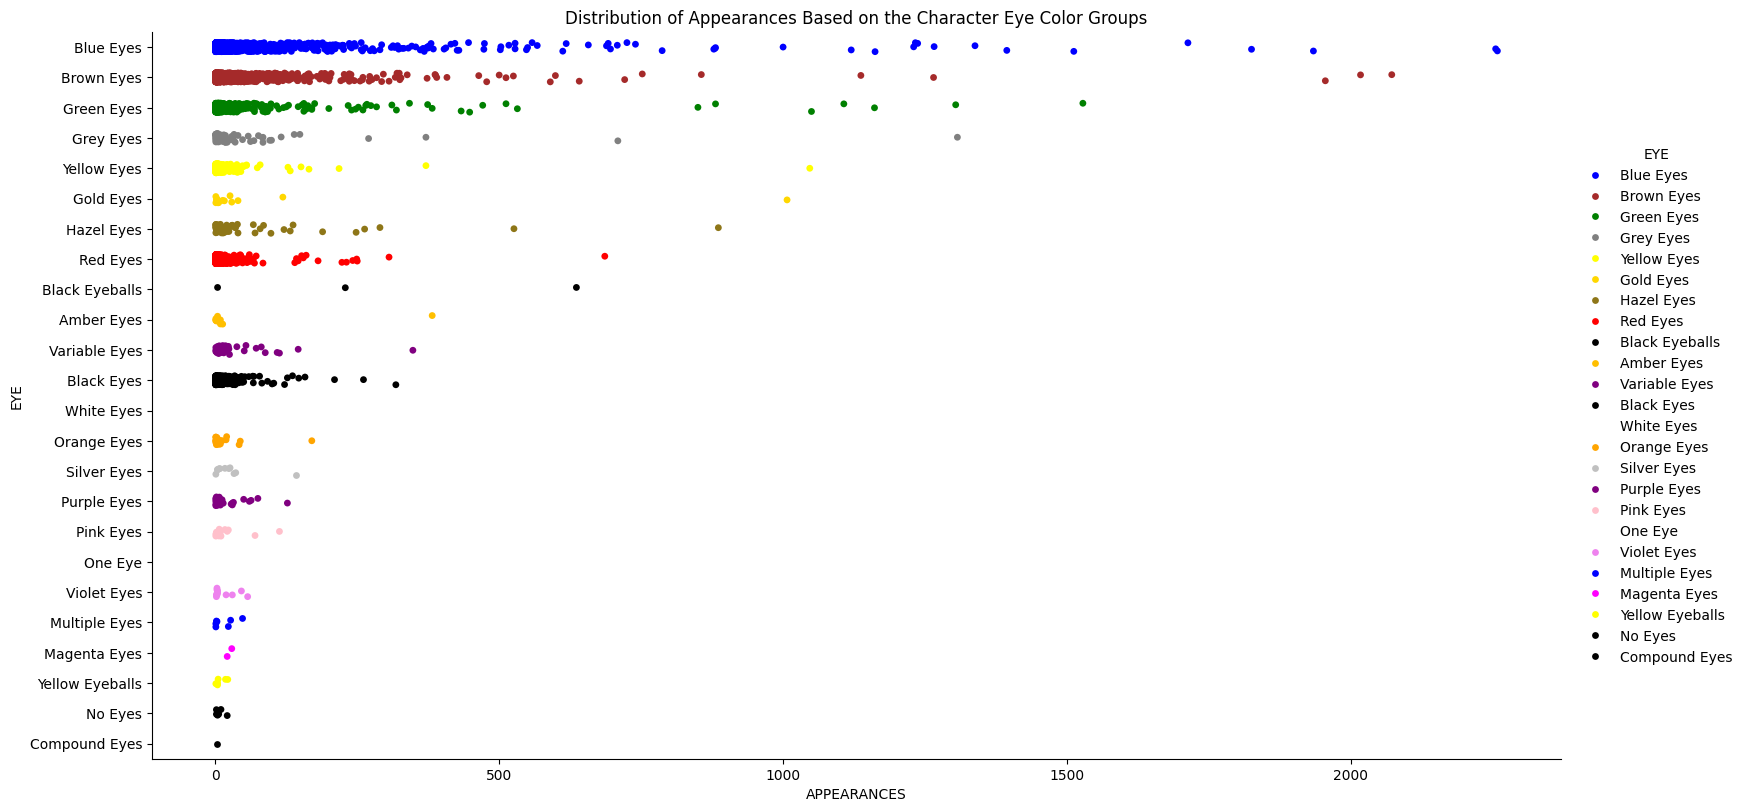

In [22]:
marvel_eye_colors = {
    "Hazel Eyes": '#8E7618',
    "Blue Eyes" : 'blue',
    "Brown Eyes": 'brown',
    "Green Eyes": 'green',
    "Grey Eyes": 'grey',
    "Yellow Eyes": 'yellow',
    "Gold Eyes": 'gold',
    "Red Eyes": 'red',
    "Black Eyeballs": 'black',
    "Amber Eyes": '#FFBF00',
    "Variable Eyes": 'purple',
    "Black Eyes": 'black',
    "White Eyes": 'white',
    "Orange Eyes": 'orange',
    "Silver Eyes": 'silver',
    "Purple Eyes": 'purple',
    "Pink Eyes": 'pink',
    "One Eye": 'white',
    "Violet Eyes": 'violet',
    "Multiple Eyes": 'blue',
    "Magenta Eyes": 'magenta',
    "Yellow Eyeballs": 'yellow',
    "No Eyes": 'black',
    "Compound Eyes": 'black'
}
sns.catplot(
    data=marvel_df[marvel_df["APPEARANCES"] < 2_600],
    x="APPEARANCES",
    y="EYE",
    aspect=2, #stretches the plot horizontally
    height=8, # adds more space in between the categorical rows
    jitter=0.15, # add more jitter for points to avoid overlapping data points
    hue="EYE",
    palette=marvel_eye_colors,
    size=4.9
)
plt.title("Distribution of Appearances Based on the Character Eye Color Groups")


## Q3. Multiples of Strip plots
Come up with a question using this dataset and use a strip plot that contains multiples (splitting the plot into multiples by a category that has two or more unique values) by using the `row` or `col` argument. State your question in a markdown cell. Recall that a strip plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

What is the distribution of appearances with respect to eye color groups based on the identity status of the characters?

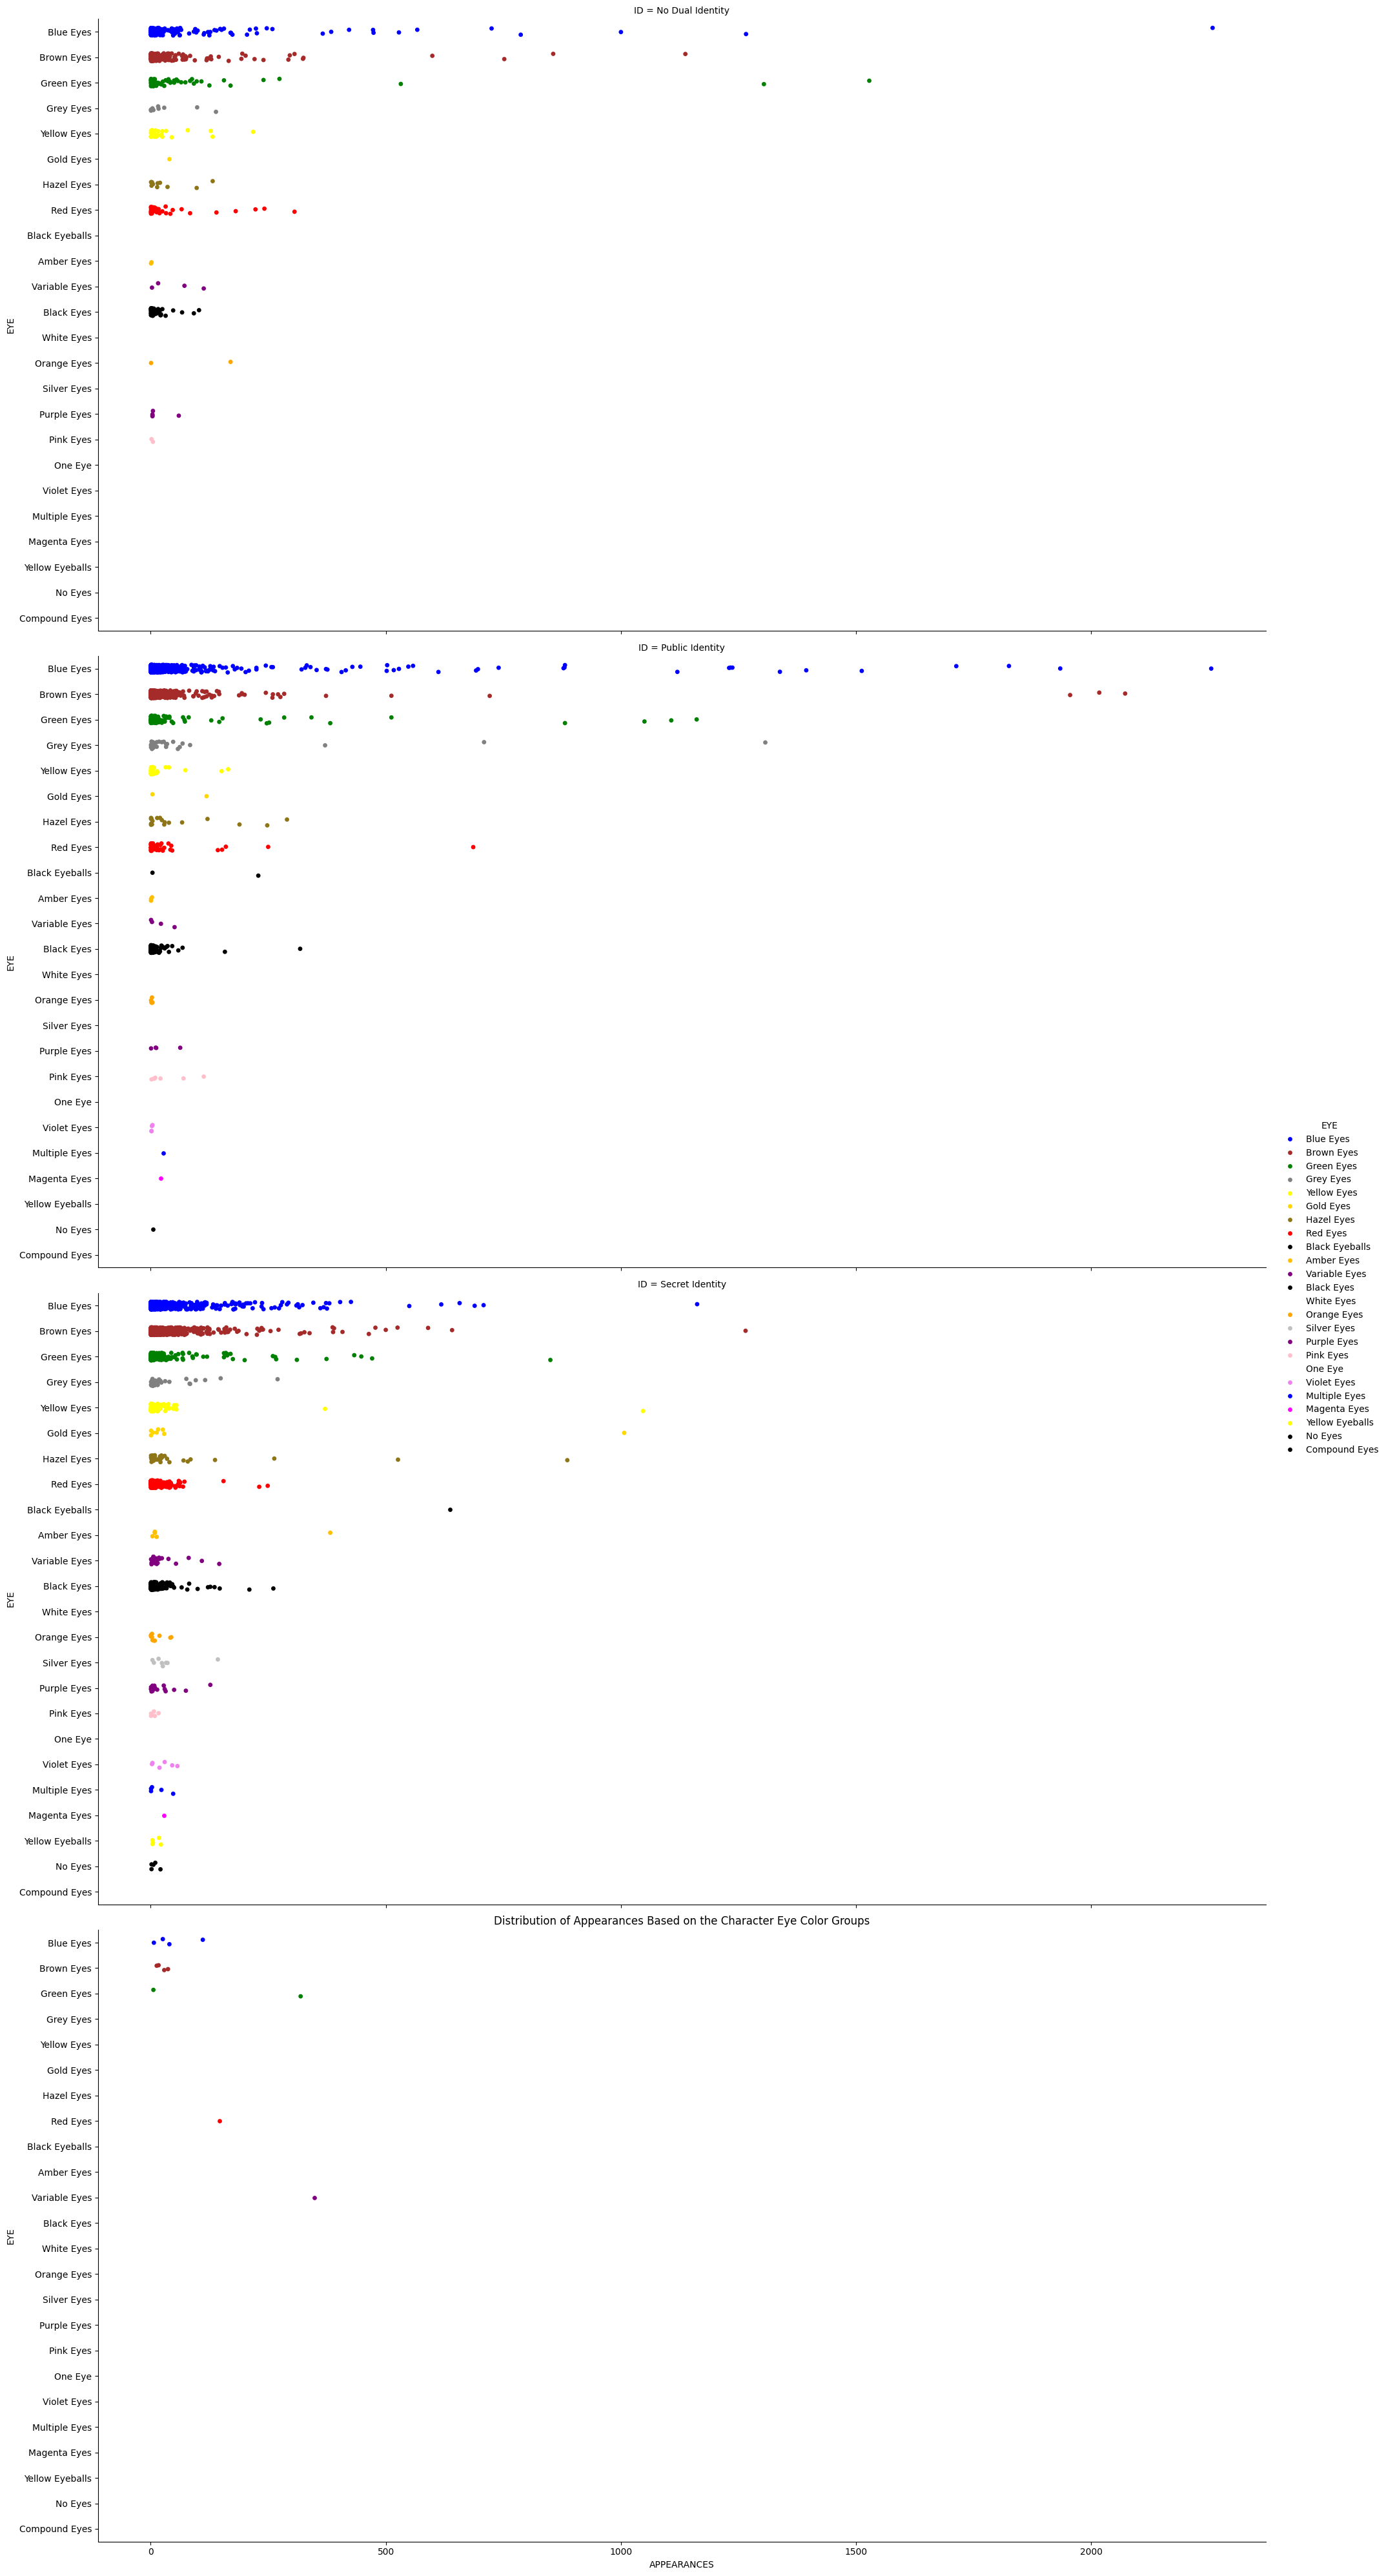

In [23]:
sns.catplot(
    data=marvel_df[marvel_df["APPEARANCES"] < 2_600],
    x="APPEARANCES",
    y="EYE",
    aspect=2, #stretches the plot horizontally
    height=10, # adds more space in between the categorical rows
    jitter=0.15, # add more jitter for points to avoid overlapping data points
    hue="EYE",
    palette=marvel_eye_colors,
    size=4.9,
    row="ID"
)
plt.title("Distribution of Appearances Based on the Character Eye Color Groups")
plt.show()

## Q4. Swarm plot
Come up with a question using this dataset and use a `swarm` plot to help answer the question. State your question in a markdown cell. Recall that a `swarm` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

What is the distribution of first appearance year based on character gender?

In [156]:
clean_marvel_df = marvel_df[["APPEARANCES", "SEX"]].dropna()

In [157]:
clean_marvel_df = clean_marvel_df[(clean_marvel_df["SEX"] == "Agender Characters") | (clean_marvel_df["SEX"] == "Genderfluid Characters")]

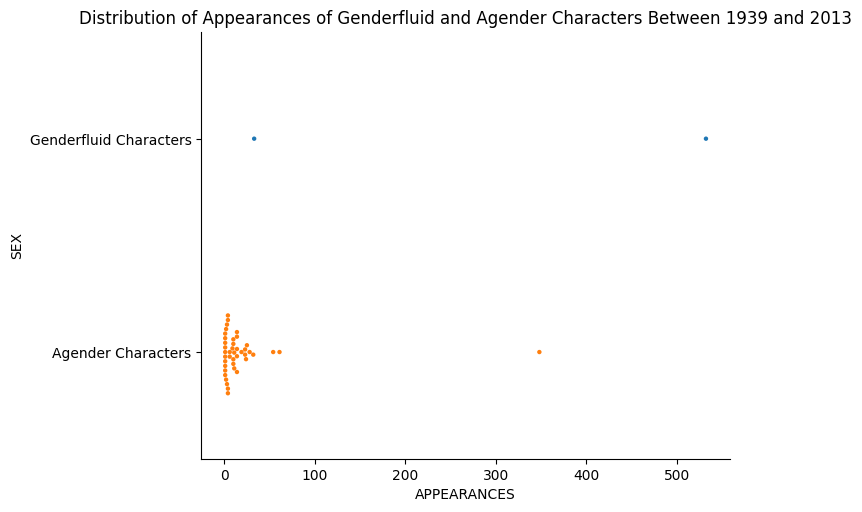

In [172]:
sns.catplot(
    data=clean_marvel_df,
    x="APPEARANCES",
    y="SEX",
    aspect=1.5, # aspect change the aspect ratio
    kind="swarm",
    height=5,
    s=10,
    hue="SEX"
    )
plt.title("Distribution of Appearances of Genderfluid and Agender Characters Between 1939 and 2013");

## Q5. Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the `swamp` plot into a `box` plot by simply changing the kind argument to `kind="box"`. Convert the swarm plot that you created in Q4 with a boxplot here. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

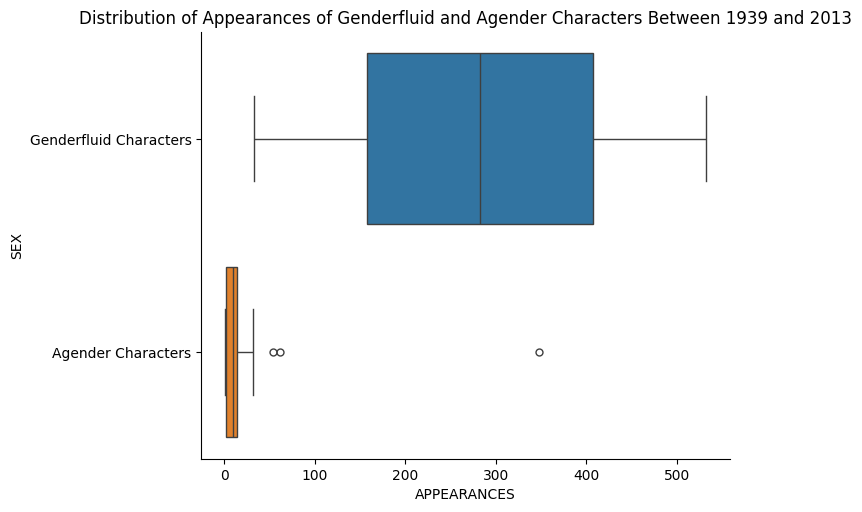

In [173]:
sns.catplot(
    data=clean_marvel_df,
    x="APPEARANCES",
    y="SEX",
    aspect=1.5, # aspect change the aspect ratio
    kind="box",
    height=5,
    hue="SEX"
    )
plt.title("Distribution of Appearances of Genderfluid and Agender Characters Between 1939 and 2013");

## Q6. Violin plots
Come up with a question using this dataset and use a `violin` plot to help answer the question. State your question in a markdown cell. Recall that a `violin` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. You might want to set setting `cut` to zero if the distribution spreads beyond the values of the data in the dataset. Be sure to include a meaning title for the plot.

What is the distribution of first appearance years based on the character gender?

In [186]:
clean_marvel_df_2 = marvel_df[["Year", "SEX"]].dropna()

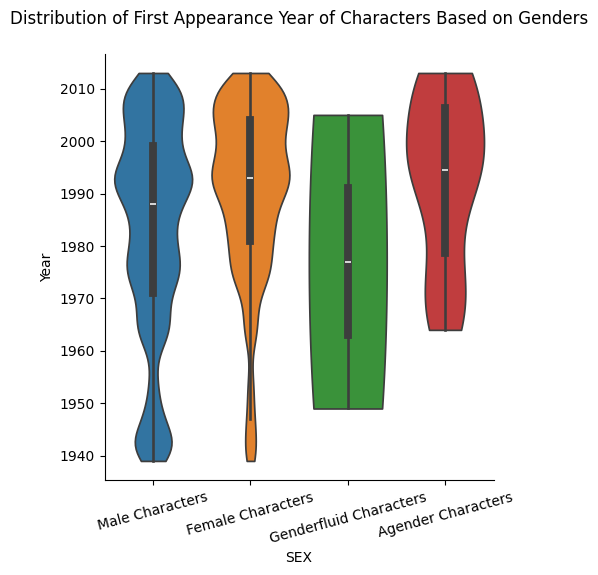

In [196]:
sns.catplot(
    data = clean_marvel_df_2,
    x = "SEX",
    y = "Year",
    kind = "violin",
    cut = 0,
    hue = "SEX"
)
plt.xticks(rotation=15)
plt.title("Distribution of First Appearance Year of Characters Based on Genders", y=1.05)
plt.show()

## Bonus:
Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`. Try to create a violin plot using the `split` parameter. You will need to come up with a dataframe using this dataset with data that has two categories.

In [204]:
clean_marvel_df_3 = marvel_df[["SEX", "Year" ,"ALIVE"]].dropna()

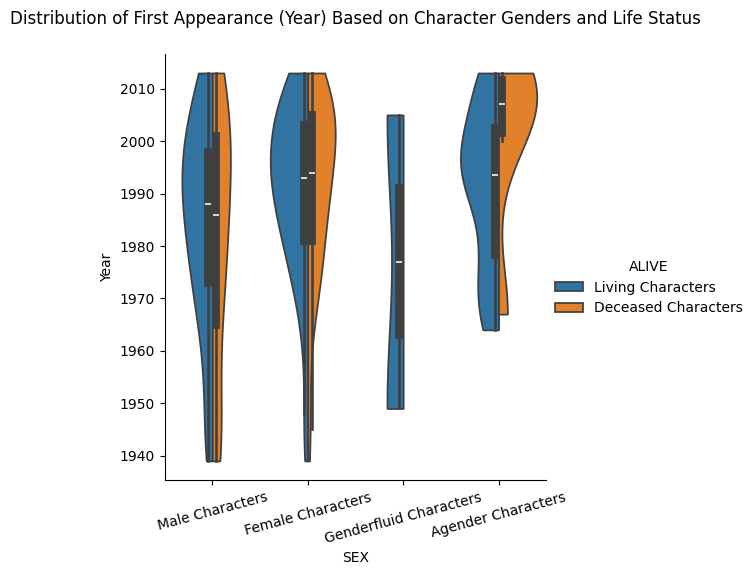

In [222]:
sns.catplot(
    data = clean_marvel_df_3,
    x = "SEX",
    y = "Year",
    kind = "violin",
    cut = 0,
    hue = "ALIVE",
    bw_method = 0.5,
    split = True
)
plt.title("Distribution of First Appearance (Year) Based on Character Genders and Life Status", y = 1.05)
plt.xticks(rotation = 15)
plt.show()